## Titanic: Machine Learning from Disaster

# Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Overview:

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.


# Variable Notes

- survival: 0-no, 1-yes
- sex: male/Female
- Ticket: Ticket number
- passenger Id 
- Name of the passenger
- pclass: A proxy for socio-economic status (SES)
<ul>
<li> 1st = Upper </li>
<li> 2nd = Middle </li>
<li> 3rd = Lower </li>
</ul>

- cabin: cabin number
- Fare: Passenger fare
- embarked : Port of Embarkation
C = Cherbourg
Q = Queenstown
S = Southampton

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
<ul>
<li> Sibling = brother, sister, stepbrother, stepsister </li>
<li> Spouse = husband, wife (mistresses and fiancés were ignored) </li>
</ul>    

- parch: The dataset defines family relations in this way...
<ul>
<li> Parent = mother, father </li>
<li> Child = daughter, son, stepdaughter, stepson </li>
<li> Some children travelled only with a nanny, therefore parch=0 for them </li>
</ul>    

In [47]:
import numpy as np 
import pandas as pd 


In [98]:
train_set = pd.read_csv("train.csv")
train_set.shape

(891, 12)

In [99]:
train_set.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [50]:
test_set = pd.read_csv("test.csv")
test_set.shape

(418, 11)

In [51]:
test_set.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [52]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#So we need to first study of our data

- 1 - PassengerId - This Column does not depend on survive   
- 2 - Pclacss - it's needed for prediction      [--Select--]
- 4 - Name - it's not useful for our prediction
- 5 - Sex - Male/ Female depends on survived because female always get a first chance   [--Select--]
- 6 - Age - Age depends on survivde  [--Select--]
- 7 - SibSp - Having siblings/spouse depends on survived  [--Select--]
- 8 - Parch - Number of childs depends on survived  [--Select--]
- 9 - Ticket - Ticket not create impact on survived
- 10 - Fare - Fare create impact om survived because who have a costly tickets ,that person have more chance to get first in lifeboat  [--Select--]
- 11 - Cabin - Cabin have more null values and its not create any impact on survived
- 12 - Embarked - it's create impact on survived  [--Select--]

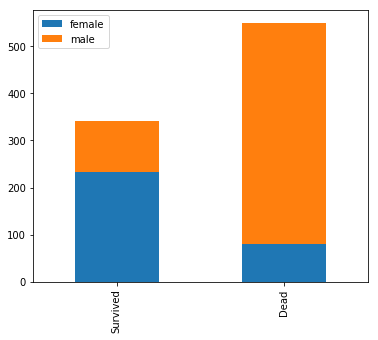

In [53]:
##Let's create funcition for barplot
def bar_chart(feature):
    survived = train_set[train_set['Survived']==1][feature].value_counts()
    dead = train_set[train_set['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(6,5))
    
bar_chart('Sex')

**Observation:**

It is seen that more females are survived than males

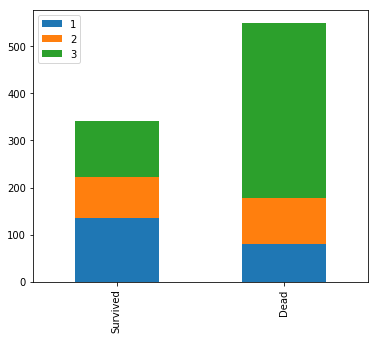

In [54]:
##Now let's see a barplot of Pclass
bar_chart('Pclass')

- It is seen that Third class members are dead more than the second and first class

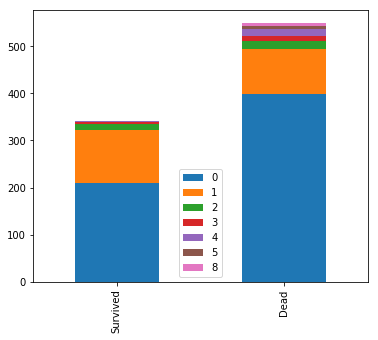

In [55]:
##Let's see for SibSp
bar_chart('SibSp')

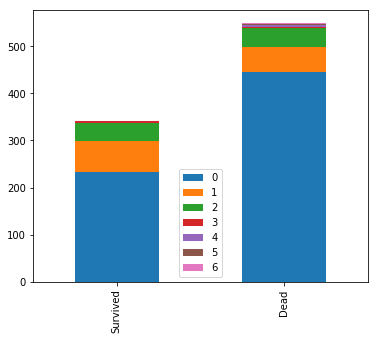

In [56]:
##Let's see for Parch
bar_chart('Parch')

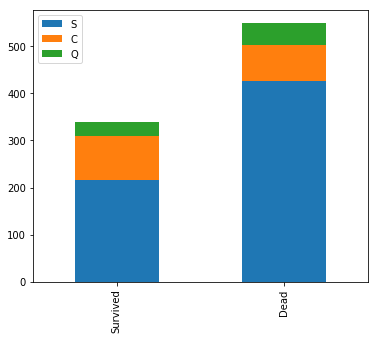

In [57]:
##Let's plot the Embarked
bar_chart('Embarked')

In [58]:
##Now let's make a list of our features matrix list
features= [ 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
##Let's devide in X and Y
x = train_set[features] # training set
y = train_set['Survived'] #target variable

In [59]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [60]:
x.isnull().sum() #checking for null values

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

- It is seen that there are 177 null values in age and 2 null values in Embarked

In [61]:
##Now fill the null values
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

x['Age'] = x['Age'].fillna(x['Age'].median())
x['Embarked']= x['Embarked'].fillna(x['Embarked'].value_counts().index[0])

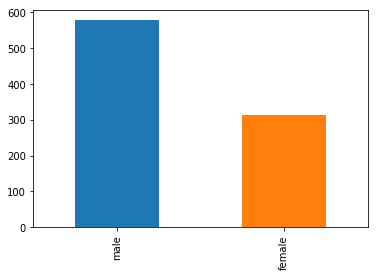

In [62]:
x['Sex'].value_counts().plot(kind='bar')

In [63]:
###Now let's enocde categorical values 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
x['Sex'] = LE.fit_transform(x['Sex'])
x['Embarked'] = LE.fit_transform(x['Embarked'])

In [64]:
x['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

It encoded male as 1 and female as 0

In [67]:
x['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int32

In [82]:
##Now everything is ok 
##Now let's Split the Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state =0)

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


In [84]:
##Now we fit our model
from xgboost import XGBClassifier
classifier = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8, 
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 10,
                    nthread= 4,
                    random_state= 2,
                    silent= True)
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.8444444444444444

In [87]:
##Now take the test data for prediction
test_data = test_set[features]

In [89]:
test_set[features].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [92]:
test_data.shape

(418, 7)

In [93]:
##Let's fill values
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [94]:
##Let's enocde categorical values
test_data['Sex'] = LE.fit_transform(test_data['Sex'])
test_data['Embarked'] = LE.fit_transform(test_data['Embarked'])

In [95]:
##Now we predict the values
prediction = classifier.predict(test_data)

In [96]:
prediction # prediction on test data values

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [102]:
##Now according to rules we have to store a prediction in csv file
output = pd.DataFrame({'PassengerId': test_set.PassengerId,'Survived': prediction})
output.to_csv('submission.csv', index=False)
output.head()
##Submission.csv is a file which we have to submit in a competition

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
